# **Introduction to Time Series**

A time series is just a sequence of random variables indexed by time:

> { Xt ​} = X1​, X2​, X3​,...

Examples:

- Daily stock prices

- Monthly rainfall

- Hourly temperature

Each observation is random, but the structure across time is what we study.

---

## 2. Moment functions: describing a time series with averages and variability

Fully describing a time series would require knowing all joint distributions of every possible combination of times — which is basically impossible.

So instead, we summarize the behavior using moments (means, variances, correlations).

---

### 2.1 Mean function (first moment)

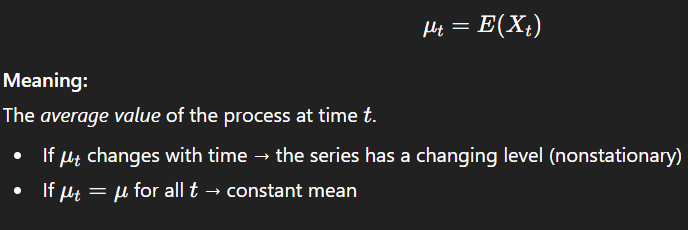

### 2.2 Variance function (second central moment)


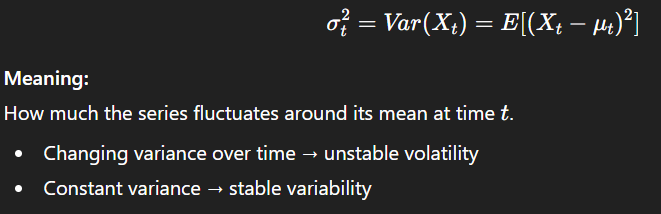

---

| Concept        | Compares                  | Same variable? | Same time? | What it measures       |
| -------------- | ------------------------- | -------------- | ---------- | ---------------------- |
| Variance       | (X_t) with itself         | Yes            | Yes        | Spread                 |
| Covariance     | (X) with (Y)              | No             | Yes        | Co-movement            |
| Autocovariance | (X_t) with (X_{t+k})      | Yes            | No         | Time dependence        |
| ACF            | Normalized autocovariance | Yes            | No         | Strength of dependence |


---

# **Stationarity: stability over time**

Stationarity means the process is in statistical equilibrium.

---

### 01. Strict stationarity (strongest form)

A time series is strictly stationary if:

    - The joint distribution does not change when shifted in time.

In simple terms:

The probabilistic behavior looks the same today as it did yesterday

⚠️ Very hard to verify in practice.

---

### 02. Weak (second-order) stationarity (used most often)

A time series is weakly stationary if:

- Constant mean

- Finite, constant variance

- Covariance depends only on the lag, not on time:


This is much easier to check and is what most models assume.

---

In [3]:
# !pip3 install PythonTsa

   ---------------------------------------- 0.0/441.1 kB ? eta -:--:--
    --------------------------------------- 10.2/441.1 kB ? eta -:--:--
   --- ----------------------------------- 41.0/441.1 kB 393.8 kB/s eta 0:00:02
   ------ -------------------------------- 71.7/441.1 kB 491.5 kB/s eta 0:00:01
   ------------ ------------------------- 143.4/441.1 kB 711.9 kB/s eta 0:00:01
   ----------------------- ---------------- 256.0/441.1 kB 1.1 MB/s eta 0:00:01
   ------------------------ --------------- 266.2/441.1 kB 1.1 MB/s eta 0:00:01
   -------------------------- ----------- 307.2/441.1 kB 951.8 kB/s eta 0:00:01
   ---------------------------------------  440.3/441.1 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 441.1/441.1 kB 1.2 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
from PythonTsa.datadir import getdtapath

In [5]:
dtapath=getdtapath()
x=pd.read_csv(dtapath + 'gdpquarterlychina1992.1-2017.4.csv',header=0)

dates = pd.date_range(start='1992',periods=len(x),freq='Q')
x.index=dates

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21156\3783615663.py:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(start='1992',periods=len(x),freq='Q')


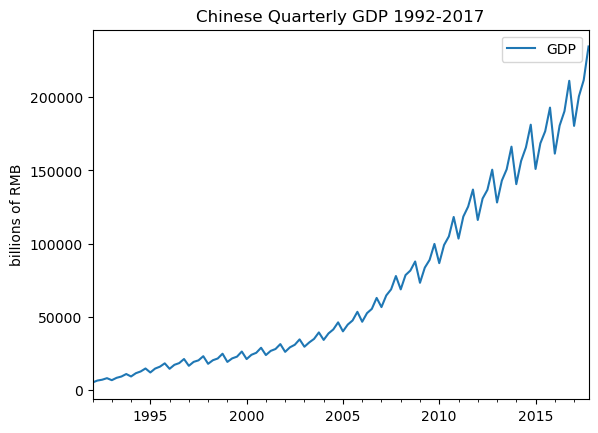

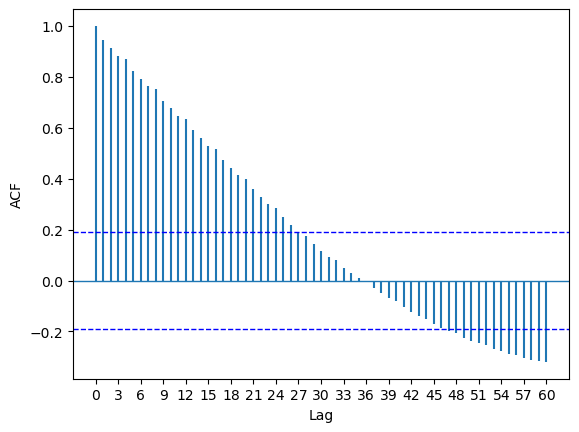

In [6]:
import matplotlib.pyplot as plt
x.plot(); plt.title('Chinese Quarterly GDP 1992-2017')
plt.ylabel('billions of RMB')
plt.show()

from PythonTsa.plot_acf_pacf import acf_pacf_fig
acf_pacf_fig(x, both=False, lag=60) #plotting ACF
plt.show()

#### **Correlogram (ACF Plot)**

- x-axis → lag

- y-axis → ACF value

---

# White noise & Random Walk

White noise is the simplest stationary series.

The white noise acts as a building block of time series and is vitally important in time series analysis. 

A white noise series:

- Observations are independent

- Constant mean and variance

- No correlation across time


In time series models, the white noise reflects information that is not observable and is sometimes called an innovation term (series).


In various engineering applications, the white noise is used as a model for noise and a random signal having equal intensity at different frequencies. 

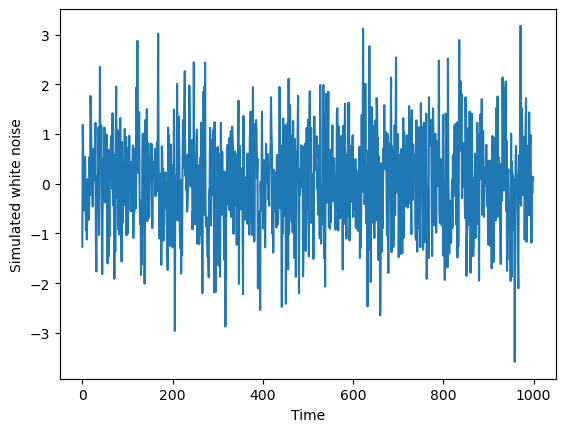

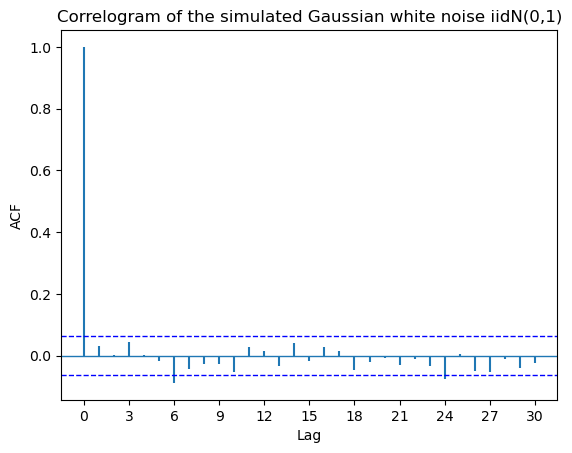

In [2]:
from numpy import random
import pandas as pd
random.seed(135) # for repeat


x=random.normal(loc=0, scale=1, size=1000)
xts=pd.Series(x)
import matplotlib.pyplot as plt
xts.plot(); plt.xlabel('Time')
plt.ylabel('Simulated white noise'); plt.show()
plt.title(' Time series plot of the simulated Gaussian white noise iidN(0,1)')


from PythonTsa.plot_acf_pacf import acf_pacf_fig
acf_pacf_fig(xts, both=False, lag=30) # plotting ACF
plt.title('Correlogram of the simulated Gaussian white noise iidN(0,1)')
plt.show()

# Why ergodicity matters

Even if a series is stationary, estimation may still fail.

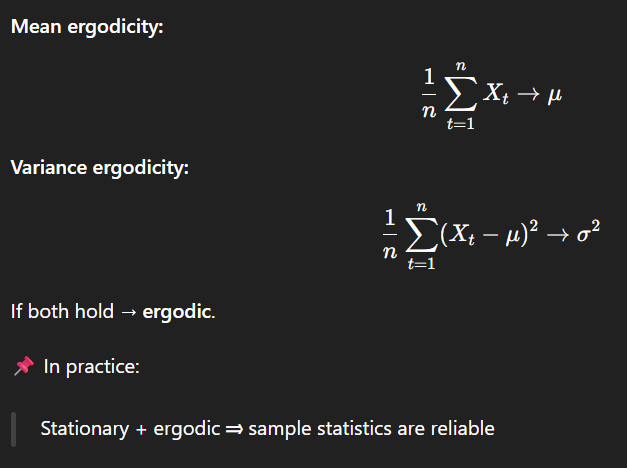